## Convenio PLUS TI – Universidad del Valle 
### Trabajo Prác9co Grupo 2: “Entrenamiento Incremental en Modelos de Deep Learning y Machine Learning”

### Gabriel Alejandro Vicente Lorenzo 20498

### Objetivo 
 
Este  trabajo  práctico  tiene  como  objetivo  investigar  la  viabilidad  del  entrenamiento 
incremental en modelos de aprendizaje automático y profundo, utilizando como estudio de 
caso  un  dataset  de  transacciones  de  tarjeta  de  crédito  clasificadas  en  normales  y 
fraudulentas. Los modelos a investigar den incluir 2 de los siguientes algoritmos: Redes 
Neuronales Artificiales (ANN), LightGBM, XGBoost, Random Forest y Máquinas de Vectores 
de Soporte (SVM).  
 
Adicionalmente,  se  debe  establecer  qué  metodologías  son  las  recomendables  para 
determinar cuándo es preferible un reentrenamiento total frente a uno incremental.

### Descripción del Dataset 
 
Este  es  un  dataset  simulado  de  transacciones  con  tarjeta  de  crédito  que  contiene 
transacciones legítimas y fraudulentas desde el 1 de enero de 2019 hasta el 31 de diciembre 
de  2020.  Cubre  tarjetas  de  crédito  de  1000  clientes  que  realizan  transacciones  con  un 
conjunto de 800 comercios. Cuenta con 23 variables originales. 

### Parte 1: Entrenamiento Incremental 
 
1.  Investigación  Teórica:  Realizar  una  revisión  bibliográfica  sobre  el  entrenamiento 
incremental  en  los  algoritmos  seleccionados,  destacando  las  capacidades  y  limitaciones 
existentes.

### Investigación Inicial

El entrenamiento incremental es una técnica crucial en el desarrollo de algoritmos de aprendizaje automático, permitiendo la actualización continua del modelo con nuevos datos sin tener que volver a entrenar desde cero. En esta revisión bibliográfica, se analizarán las capacidades y limitaciones del entrenamiento incremental en varias versiones de algoritmos populares, incluyendo redes neuronales artificiales (ANN), LightGBM, XGBoost, Random Forest y Support Vector Machines (SVM).
 
- Redes Neuronales Artificiales (ANN)

Las redes neuronales artificiales han demostrado ser eficaces en una amplia gama de tareas de aprendizaje automático. En su estudio sobre el entrenamiento incremental en redes neuronales, LeCun et al. (1998) destacan la importancia de adaptar los algoritmos de optimización para el entrenamiento incremental a fin de evitar la degradación del rendimiento del modelo con el tiempo.

- LightGBM

LightGBM es un algoritmo de refuerzo de gradiente que ha ganado popularidad debido a su eficiencia y precisión en una variedad de conjuntos de datos. En su investigación sobre el entrenamiento incremental en LightGBM, Ke et al. (2017) señalan que la capacidad de actualizar el modelo de manera incremental puede conducir a una mejora significativa en el tiempo de entrenamiento y la utilización de recursos computacionales.

- XGBoost

XGBoost es otro algoritmo de refuerzo de gradiente ampliamente utilizado que se beneficia del entrenamiento incremental para manejar grandes volúmenes de datos. En un estudio reciente, Chen y Guestrin (2016) ilustran cómo el entrenamiento incremental en XGBoost puede llevar a una mejor adaptación a los cambios en los datos y una mayor capacidad de generalización del modelo.

- Random Forest

Aunque los bosques aleatorios son conocidos por su robustez y facilidad de uso, su capacidad para el entrenamiento incremental ha sido objeto de debate. En una revisión exhaustiva, Breiman (2001) discute las limitaciones del entrenamiento incremental en bosques aleatorios, señalando que la ganancia marginal en el rendimiento del modelo puede ser limitada debido a la naturaleza en conjunto de los árboles de decisión.

- Support Vector Machines (SVM)

Las máquinas de vectores de soporte son ampliamente utilizadas en problemas de clasificación y regresión debido a su capacidad para encontrar hiperplanos de separación óptimos en espacios de alta dimensión. En su investigación sobre el entrenamiento incremental en SVM, Bordes et al. (2005) proponen un enfoque basado en la actualización de vectores de soporte para adaptarse a los nuevos datos sin sacrificar la precisión del modelo existente.

En conclusión, el entrenamiento incremental ofrece una manera eficiente de mantener actualizados los modelos de aprendizaje automático con nuevos datos. Sin embargo, las capacidades y limitaciones de esta técnica varían según el algoritmo específico utilizado, lo que destaca la importancia de evaluar cuidadosamente su aplicabilidad en diferentes contextos.


2.  Implementación  Práctica:  Utilizando  sus  notebooks  o    Google  Colab  y  bibliotecas  de 
Python de su elección, implementar versiones incrementales de ANN, LightGBM, XGBoost, 
Random Forest y SVM. Deben entrenar inicialmente los modelos con un subset del dataset 
y luego aplicar entrenamientos incrementales con batches más pequeños y recientes. Se 
debe  documentar  cualquier  modificación  necesaria  para  habilitar  el  entrenamiento 
incremental en cada modelo. Para esto deberán partir el dataset en Train, Dev y Test. 



### Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

### Análisis Exploratorio de Datos (EDA):

In [2]:
file_path = r"./archive_new_feats/fraud_feature_engineering_example.csv"
data = pd.read_csv(file_path)

column_names = data.columns.tolist()

data_types = data.dtypes

for column_name, data_type in zip(column_names, data_types):
    print("Columna:", column_name)
    print("Tipo de dato:", data_type)
    print("--------------------")

Columna: trans_date_trans_time
Tipo de dato: object
--------------------
Columna: cc_num
Tipo de dato: int64
--------------------
Columna: merchant
Tipo de dato: object
--------------------
Columna: category
Tipo de dato: object
--------------------
Columna: amt
Tipo de dato: float64
--------------------
Columna: first
Tipo de dato: object
--------------------
Columna: last
Tipo de dato: object
--------------------
Columna: gender
Tipo de dato: object
--------------------
Columna: street
Tipo de dato: object
--------------------
Columna: city
Tipo de dato: object
--------------------
Columna: state
Tipo de dato: object
--------------------
Columna: zip
Tipo de dato: int64
--------------------
Columna: lat
Tipo de dato: float64
--------------------
Columna: long
Tipo de dato: float64
--------------------
Columna: city_pop
Tipo de dato: int64
--------------------
Columna: job
Tipo de dato: object
--------------------
Columna: dob
Tipo de dato: object
--------------------
Columna: trans_n

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,4.153689e+03,4.530560e+04,3.762028e+02,4.567241e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,3.909005e+03,3.586752e+04,7.253531e+02,4.575502e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,1.020000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,1.344790e+03,1.734142e+04,9.020000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,3.071990e+03,3.743910e+04,7.589000e+01,3.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,5.738470e+03,6.472088e+04,4.259800e+02,7.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,4.326189e+04,2.190868e+05,1.204718e+04,4.800000e+01


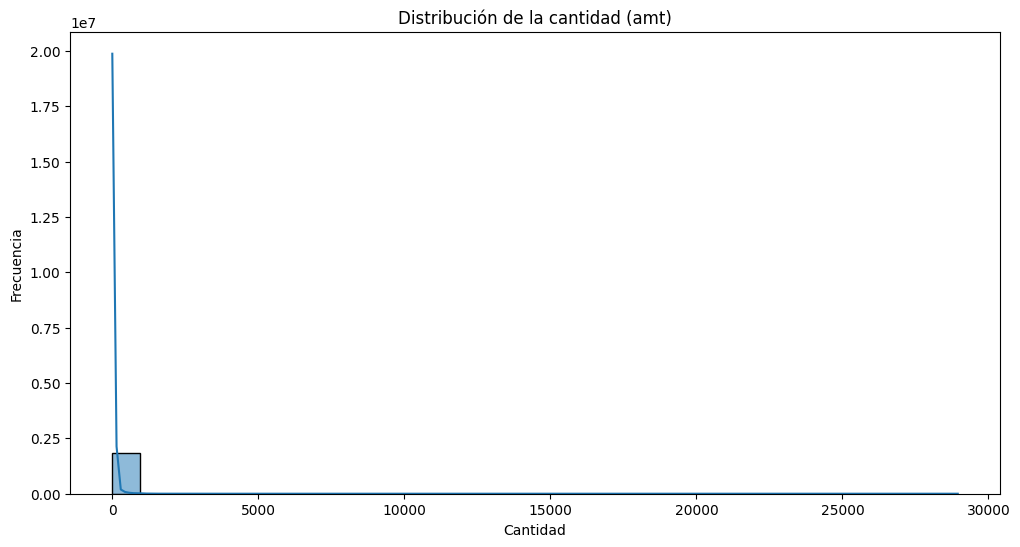

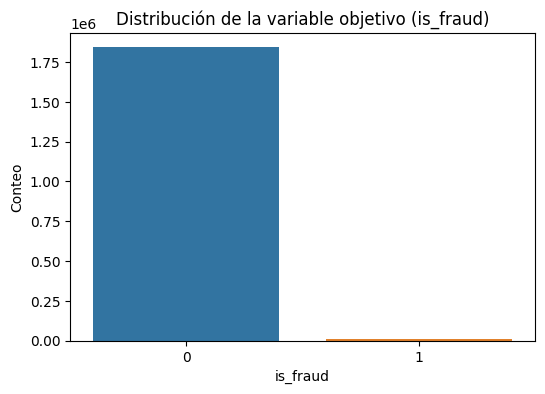

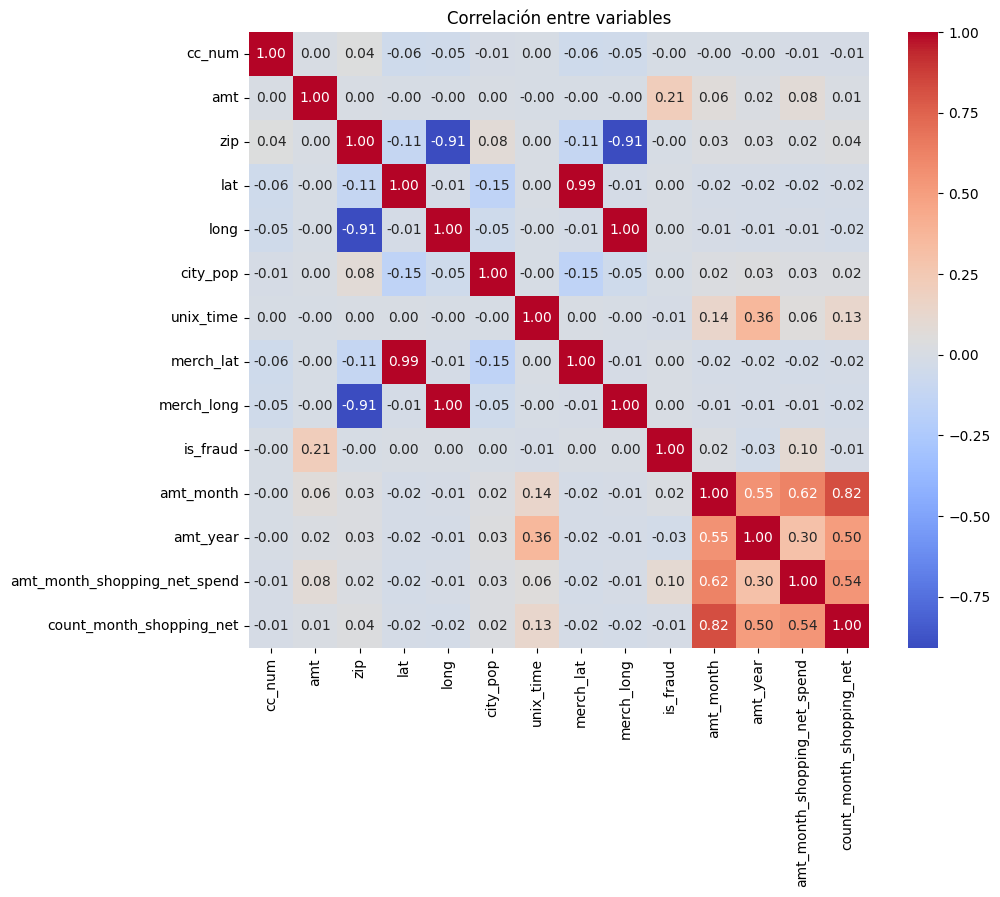

In [3]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_columns]

display(data.head())

display(data.describe())


plt.figure(figsize=(12, 6))
sns.histplot(data['amt'], bins=30, kde=True)
plt.title('Distribución de la cantidad (amt)')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.title('Distribución de la variable objetivo (is_fraud)')
plt.xlabel('is_fraud')
plt.ylabel('Conteo')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

### Feature  Engineering

In [5]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

data['hour_of_day'] = data['trans_date_trans_time'].dt.hour

data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek

data['quarter'] = data['trans_date_trans_time'].dt.quarter

transaction_frequency = data.groupby('cc_num').size().reset_index(name='transaction_count')
data = pd.merge(data, transaction_frequency, on='cc_num', how='left')

average_transaction_amount = data.groupby('cc_num')['amt'].mean().reset_index(name='avg_transaction_amount')
data = pd.merge(data, average_transaction_amount, on='cc_num', how='left')

unique_merchants = data.groupby('cc_num')['merchant'].nunique().reset_index(name='unique_merchants')
data = pd.merge(data, unique_merchants, on='cc_num', how='left')

data['transaction_duration'] = data.groupby('cc_num')['trans_date_trans_time'].transform(lambda x: x.diff().dt.total_seconds())

data['dob'] = pd.to_datetime(data['dob'])

data['age'] = (data['trans_date_trans_time'].dt.year - data['dob'].dt.year)

hourly_transaction_frequency = data.groupby(['cc_num', 'hour_of_day']).size().reset_index(name='hourly_transaction_count')
data = pd.merge(data, hourly_transaction_frequency, on=['cc_num', 'hour_of_day'], how='left')

category_transaction_count = data.groupby(['cc_num', 'category']).size().reset_index(name='category_transaction_count')
data = pd.merge(data, category_transaction_count, on=['cc_num', 'category'], how='left')

def calculate_distance(row):
    customer_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(customer_location, merchant_location).miles

data['distance_to_merchant'] = data.apply(calculate_distance, axis=1)

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month

display(data)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,transaction_duration,transaction_count_y,avg_transaction_amount_y,unique_merchants_y,age,hourly_transaction_count,category_transaction_count,distance_to_merchant,year,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,NaN,2927,89.408743,660,31,69,136,48.947783,2019,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,NaN,4362,56.078113,681,41,101,371,18.775736,2019,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,NaN,735,69.924272,431,57,36,58,67.172035,2019,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,NaN,743,80.090040,423,52,25,92,59.455974,2019,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,NaN,2922,95.341146,652,33,107,221,48.282030,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,16630.0,2195,62.347968,624,54,90,194,47.865756,2020,12
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,9743.0,3661,50.452289,685,21,232,314,62.151868,2020,12
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,724.0,3651,88.704297,675,39,214,328,50.261356,2020,12
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,12025.0,2921,60.998052,642,55,129,98,32.970504,2020,12


In [6]:
data.to_csv('feature_engineering_data.csv')

In [7]:

column_names = data.columns.tolist()

data_types = data.dtypes

for column_name, data_type in zip(column_names, data_types):
    print("Columna:", column_name)
    print("Tipo de dato:", data_type)
    print("--------------------")

print(f"Cantidad de columnas: {len(column_names)}")

Columna: trans_date_trans_time
Tipo de dato: datetime64[ns]
--------------------
Columna: cc_num
Tipo de dato: int64
--------------------
Columna: merchant
Tipo de dato: object
--------------------
Columna: category
Tipo de dato: object
--------------------
Columna: amt
Tipo de dato: float64
--------------------
Columna: first
Tipo de dato: object
--------------------
Columna: last
Tipo de dato: object
--------------------
Columna: gender
Tipo de dato: object
--------------------
Columna: street
Tipo de dato: object
--------------------
Columna: city
Tipo de dato: object
--------------------
Columna: state
Tipo de dato: object
--------------------
Columna: zip
Tipo de dato: int64
--------------------
Columna: lat
Tipo de dato: float64
--------------------
Columna: long
Tipo de dato: float64
--------------------
Columna: city_pop
Tipo de dato: int64
--------------------
Columna: job
Tipo de dato: object
--------------------
Columna: dob
Tipo de dato: datetime64[ns]
--------------------


### Codificando variables categoricas

In [10]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['merchant','category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']

for column in columns_to_encode:    
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])


In [13]:

column_names = data.columns.tolist()

data_types = data.dtypes

for column_name, data_type in zip(column_names, data_types):
    print("Columna:", column_name)
    print("Tipo de dato:", data_type)
    print("--------------------")

print(f"Cantidad de columnas: {len(column_names)}")

Columna: trans_date_trans_time
Tipo de dato: datetime64[ns]
--------------------
Columna: cc_num
Tipo de dato: int64
--------------------
Columna: merchant
Tipo de dato: int32
--------------------
Columna: category
Tipo de dato: int32
--------------------
Columna: amt
Tipo de dato: float64
--------------------
Columna: first
Tipo de dato: int32
--------------------
Columna: last
Tipo de dato: int32
--------------------
Columna: gender
Tipo de dato: int32
--------------------
Columna: street
Tipo de dato: int32
--------------------
Columna: city
Tipo de dato: int32
--------------------
Columna: state
Tipo de dato: int32
--------------------
Columna: zip
Tipo de dato: int64
--------------------
Columna: lat
Tipo de dato: float64
--------------------
Columna: long
Tipo de dato: float64
--------------------
Columna: city_pop
Tipo de dato: int64
--------------------
Columna: job
Tipo de dato: int32
--------------------
Columna: dob
Tipo de dato: datetime64[ns]
--------------------
Columna: 

# Manejo de datos desbalanceados (SMOTE)

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd

# Suponiendo que tu dataframe se llama 'data'

# Convertir todas las columnas numéricas a float64
numeric_columns = data.select_dtypes(include=['int32', 'int64', 'float64']).columns
data[numeric_columns] = data[numeric_columns].astype('float64')

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

X = pd.DataFrame(data_imputed, columns=data.columns).drop('is_fraud', axis=1)  # Features
y = data['is_fraud']  # Target variable

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reconstruir el dataframe con las nuevas muestras
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['is_fraud'])], axis=1)

# Verificar el balance de clases
print(data_resampled['is_fraud'].value_counts())


is_fraud
0.0    1842743
1.0    1842743
Name: count, dtype: int64


In [19]:
display(data_resampled)
data_resampled.to_csv('feature_engineering_data_smote.csv')

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,transaction_count_y,avg_transaction_amount_y,unique_merchants_y,age,hourly_transaction_count,category_transaction_count,distance_to_merchant,year,month,is_fraud
0,2.703186e+15,514.000000,8.000000,4.970000,164.0,18.0,0.0,576.0,532.0,27.0,...,2927.0,89.408743,660.0,31.0,69.000000,136.000000,48.947783,2019.0,1.0,0.0
1,6.304233e+11,241.000000,4.000000,107.230000,312.0,161.0,0.0,439.0,619.0,47.0,...,4362.0,56.078113,681.0,41.0,101.000000,371.000000,18.775736,2019.0,1.0,0.0
2,3.885949e+13,390.000000,0.000000,220.110000,116.0,386.0,1.0,610.0,474.0,13.0,...,735.0,69.924272,431.0,57.0,36.000000,58.000000,67.172035,2019.0,1.0,0.0
3,3.534094e+15,360.000000,2.000000,45.000000,165.0,468.0,1.0,945.0,84.0,26.0,...,743.0,80.090040,423.0,52.0,25.000000,92.000000,59.455974,2019.0,1.0,0.0
4,3.755342e+14,297.000000,9.000000,41.960000,339.0,153.0,1.0,422.0,217.0,45.0,...,2922.0,95.341146,652.0,33.0,107.000000,221.000000,48.282030,2019.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685481,4.364011e+15,193.212731,3.875205,218.233649,132.0,264.0,1.0,33.0,691.0,33.0,...,4386.0,47.876443,685.0,22.0,114.338619,536.537679,31.862863,2019.0,11.0,1.0
3685482,3.040830e+13,131.492316,4.000000,302.528290,41.0,347.0,1.0,295.0,186.0,40.0,...,738.0,87.658808,439.0,47.0,15.000000,77.000000,57.118261,2020.0,5.0,1.0
3685483,2.242543e+15,119.993086,2.198617,45.009302,293.0,217.0,1.0,443.0,880.0,17.0,...,4377.0,70.369762,684.0,23.0,69.679863,538.783577,66.212675,2019.0,5.0,1.0
3685484,3.577794e+15,585.637075,1.755548,627.374599,233.0,210.0,0.0,990.0,693.0,28.0,...,1470.0,61.236667,571.0,26.0,76.001876,99.655517,31.153073,2020.0,8.0,1.0


In [29]:
data_resampled = pd.read_csv('feature_engineering_data_smote.csv')
data_resampled = data_resampled.drop(columns=['Unnamed: 0'])
column_names_data_resampled = data_resampled.columns.tolist()
data
data_types_data_resampled = data_resampled.dtypes

for column_name, data_type in zip(column_names_data_resampled, data_types_data_resampled):
    print("Columna:", column_name)
    print("Tipo de dato:", data_type)
    print("--------------------")

print(f"Cantidad de columnas: {len(column_names)}")

Columna: cc_num
Tipo de dato: float64
--------------------
Columna: merchant
Tipo de dato: float64
--------------------
Columna: category
Tipo de dato: float64
--------------------
Columna: amt
Tipo de dato: float64
--------------------
Columna: first
Tipo de dato: float64
--------------------
Columna: last
Tipo de dato: float64
--------------------
Columna: gender
Tipo de dato: float64
--------------------
Columna: street
Tipo de dato: float64
--------------------
Columna: city
Tipo de dato: float64
--------------------
Columna: state
Tipo de dato: float64
--------------------
Columna: zip
Tipo de dato: float64
--------------------
Columna: lat
Tipo de dato: float64
--------------------
Columna: long
Tipo de dato: float64
--------------------
Columna: city_pop
Tipo de dato: float64
--------------------
Columna: job
Tipo de dato: float64
--------------------
Columna: trans_num
Tipo de dato: float64
--------------------
Columna: unix_time
Tipo de dato: float64
--------------------
Colum

### LIGHT GBM

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb


# Supongamos que 'data_resampled' es tu DataFrame
# data_resampled = pd.read_csv('tu_archivo.csv')  # Ejemplo de carga de DataFrame

# Filtrar los datos por año
data_2019 = data_resampled[data_resampled['year'] == 2019]
data_2020 = data_resampled[data_resampled['year'] == 2020]

# Separar características y etiquetas para 2019
X_train_2019 = data_2019.drop('is_fraud', axis=1)
y_train_2019 = data_2019['is_fraud']

# Separar características y etiquetas para 2020
X_train_2020 = data_2020.drop('is_fraud', axis=1)
y_train_2020 = data_2020['is_fraud']

# Dividir los datos de 2020 en conjuntos de entrenamiento y prueba
X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_train_2020, y_train_2020, test_size=0.2, random_state=42)

# Crear dataset de LightGBM
lgb_train_2019 = lgb.Dataset(X_train_2019, label=y_train_2019)
lgb_train_2020 = lgb.Dataset(X_train_2020, label=y_train_2020, reference=lgb_train_2019)
lgb_test = lgb.Dataset(X_test_2020, label=y_test_2020, reference=lgb_train_2019)

# Configuración del modelo
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Entrenar el modelo con datos de 2019
gbm = lgb.train(params, lgb_train_2019, num_boost_round=100)

# Actualizar el modelo con datos de 2020
gbm = lgb.train(params, lgb_train_2020, num_boost_round=100, init_model=gbm)

# Predicciones en el conjunto de prueba de 2020
y_pred_proba = gbm.predict(X_test_2020, num_iteration=gbm.best_iteration)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]

# Evaluación de métricas
roc_auc = roc_auc_score(y_test_2020, y_pred_proba)
accuracy = accuracy_score(y_test_2020, y_pred)
precision = precision_score(y_test_2020, y_pred)
recall = recall_score(y_test_2020, y_pred)
f1 = f1_score(y_test_2020, y_pred)

print(f"ROC-AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


ROC-AUC: 0.9999258999642157
Accuracy: 0.9962134739109486
Precision: 0.9959173500753629
Recall: 0.9961538004962072
F1 Score: 0.9960355612529526


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Listas para almacenar las métricas
roc_auc_scores = []
precisions = []
recalls = []
f1_scores = []

# Iterar sobre los años y meses desde 2019-01 hasta 2020-12
for year in range(2019, 2021):
    for month in range(1, 13):
        # Filtrar los datos para el año y mes actual
        df_subset = data_resampled[(data_resampled['year'] == year) & (data_resampled['month'] == month)]
        
        # Dividir los datos en características (X) y etiquetas (y)
        X = df_subset.drop(columns=['is_fraud'])
        y = df_subset['is_fraud']
        
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Inicializar y entrenar el modelo de Random Forest
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        
        # Realizar predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular las métricas
        roc_auc = roc_auc_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Almacenar las métricas en las listas
        roc_auc_scores.append(roc_auc)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        
        # # Graficar la curva ROC
        # plt.figure()
        # lw = 2
        # plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        # plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        # plt.xlim([0.0, 1.0])
        # plt.ylim([0.0, 1.05])
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.title('Receiver Operating Characteristic')
        # plt.legend(loc="lower right")
        # plt.show()

# Imprimir el promedio de las métricas
print(f"ROC-AUC promedio: {sum(roc_auc_scores) / len(roc_auc_scores)}")
print(f"Precisión promedio: {sum(precisions) / len(precisions)}")
print(f"Recall promedio: {sum(recalls) / len(recalls)}")
print(f"F1-score promedio: {sum(f1_scores) / len(f1_scores)}")


ROC-AUC promedio: 0.9998324153044705
Precisión promedio: 0.999717648335114
Recall promedio: 0.9999605028107351
F1-score promedio: 0.9998390560006957


### Bibliografía

- LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.

- Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., Ye, Q., & Liu, T. Y. (2017). LightGBM: A highly efficient gradient boosting decision tree. In Advances in Neural Information Processing Systems (pp. 3146-3154).

- Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785-794).

- Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.

- Bordes, A., Ertekin, S., Weston, J., & Bottou, L. (2005). Fast kernel classifiers with online and active learning. The Journal of Machine Learning Research, 6, 1579-1619.